In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from IPython.display import Audio # We only need the Audio 'Class' from this package

# Class 11 - DST Lab Spring 2023
## New York University

# Representing Digital Filters

## Filter Block Diagrams

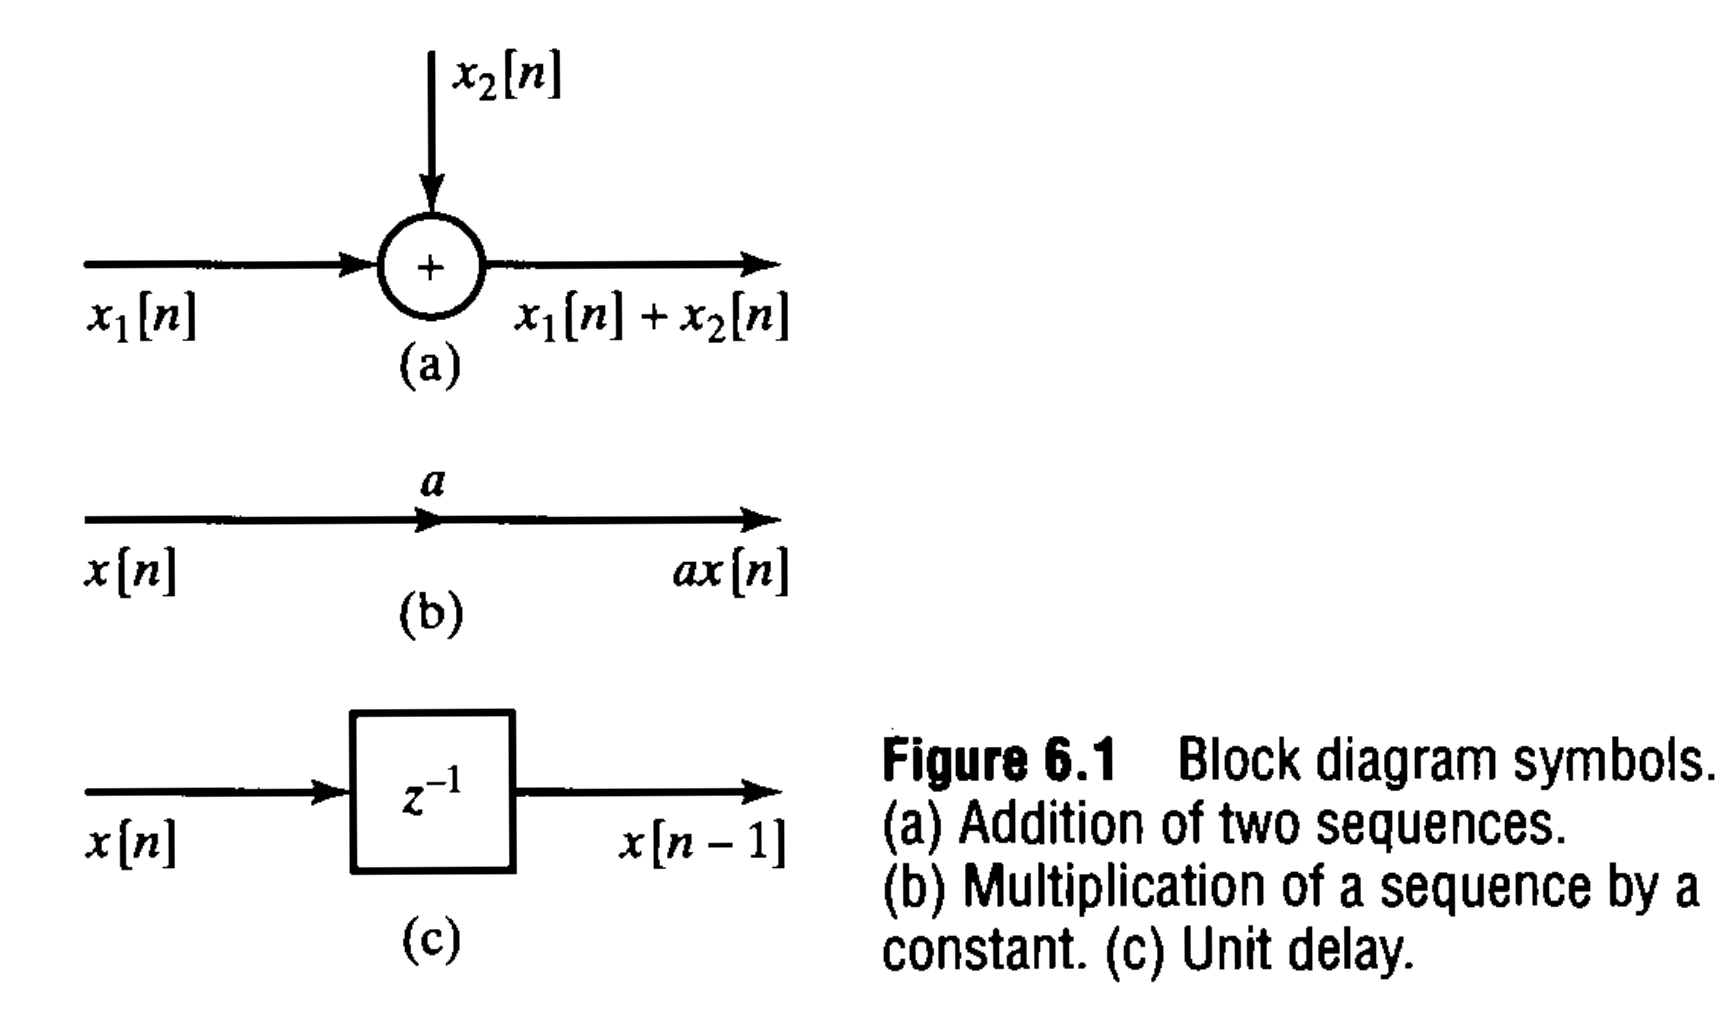


## Filter Transfer Functions
Frequency domain description of an LTI system, using the z-transform, a mathematical transform similar to the fourier transform.

H(z) = Y(z)/X(z) where H(z) is the z-transform of the time domain impulse response h[n]

The most important z-transform equivalency is that z^-1 in the frequency domain is equivalent to a delay of one sample in the time domain


## First Order Canonical Filters

Standard form for a filter that can act as a highpass, lowpass or allpass depending on filter coefficients

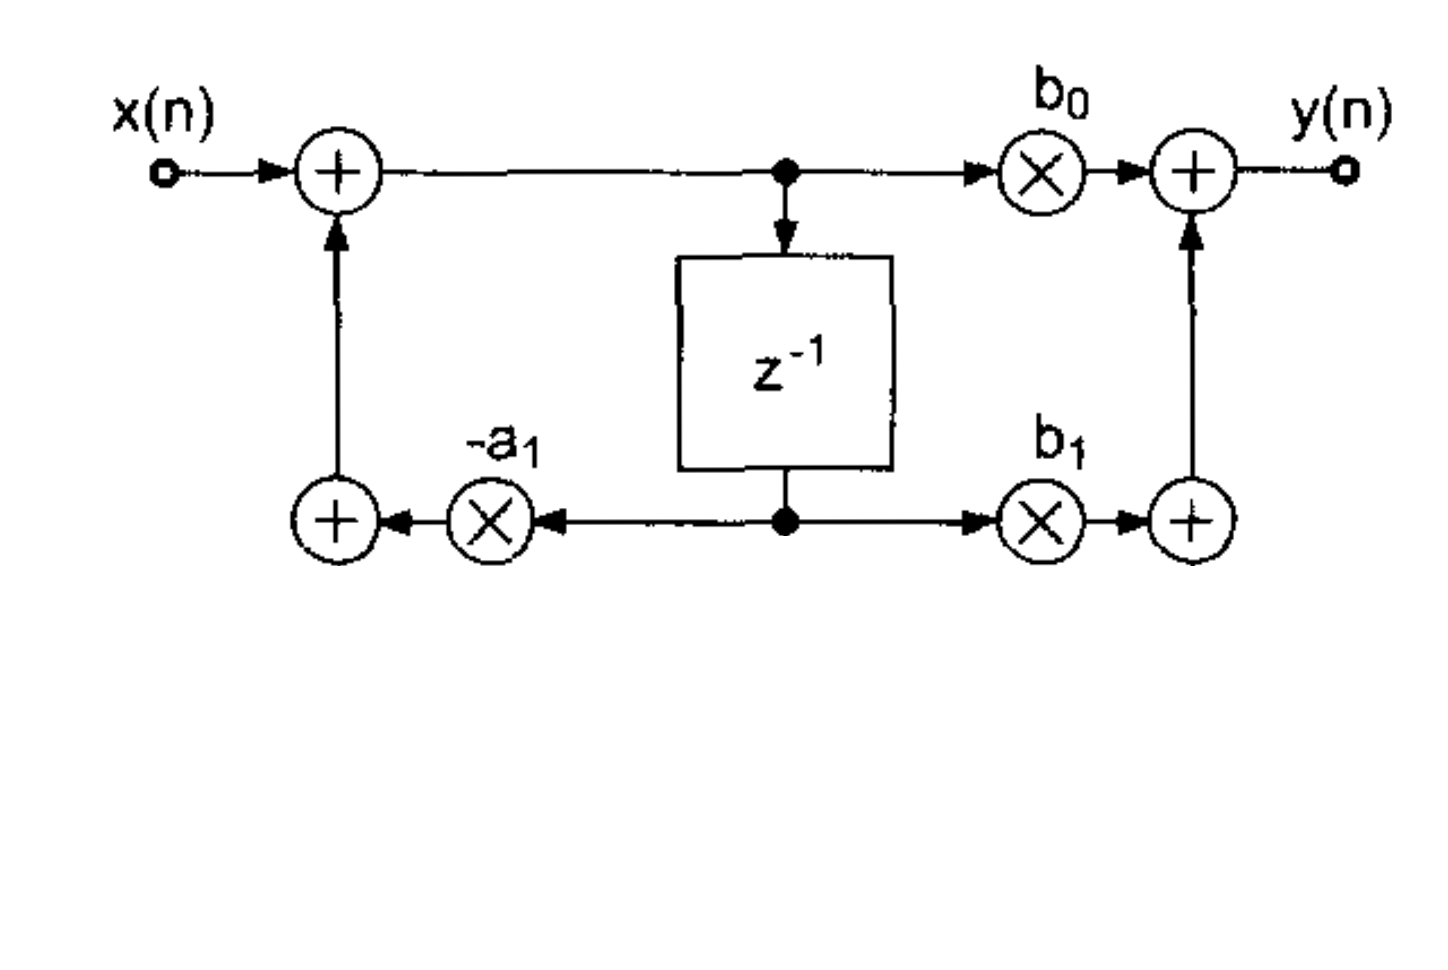

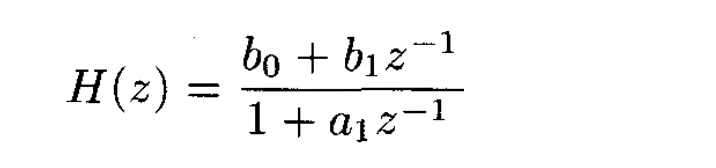


### Calculating Filter Coefficients

In [ ]:
# y[n] = b0*x[n] + b1*x[n-1] - a1*y[n-1]

#filter coefficients for a first order canonical lowpass filter
K = np.tan(np.pi*cutoff_freq/sample_rate)
b0 = K / (K+1)
b1 = K / (K+1)
a1 = (K-1)/(K+1)

#filter coefficients for a first order canonical highpass filter
K = np.tan(np.pi*cutoff_freq/sample_rate) 
b0 = 1 / (K+1)
b1 = -1 / (K+1)
a1 = (K-1)/(K+1)


### First Order Lowpass filter

In [2]:
def firstOrderLowpass(x, cutoff_freq, sample_rate):
    # calculate filter coefficients here
    K = np.tan(np.pi*cutoff_freq/sample_rate)
    b0 = K / (K+1)
    b1 = K / (K+1)
    a1 = (K-1)/(K+1)
    
    y = np.zeros(len(x))
    
    for n in range(len(x)):
        #apply difference equation here
        y[n] = b0*x[n] + b1*x[n-1] - a1*y[n-1]
        
    return y

In [5]:
data, sr = sf.read("sig.wav")

y = firstOrderLowpass(data, 1000, sr)

Audio(y, rate = sr)

## First Order Highpass Filter

In [6]:
def firstOrderHighpass(x, cutoff_freq, sample_rate):

    K = np.tan(np.pi*cutoff_freq/sample_rate)
    
    b0 = 1 / (K+1)
    b1 = -1 / (K+1)
    a1 = (K-1)/(K+1)

    y = np.zeros(len(x))
    
    for n in range(len(x)):
        y[n] = b0 * x[n] + b1 * x[n-1] - a1 * y[n-1]
    
    return y

In [7]:
data, sr = sf.read("sig.wav")

y = firstOrderHighpass(data, 2000, sr)

Audio(y, rate = sr)

## Second Order Canonical Filters

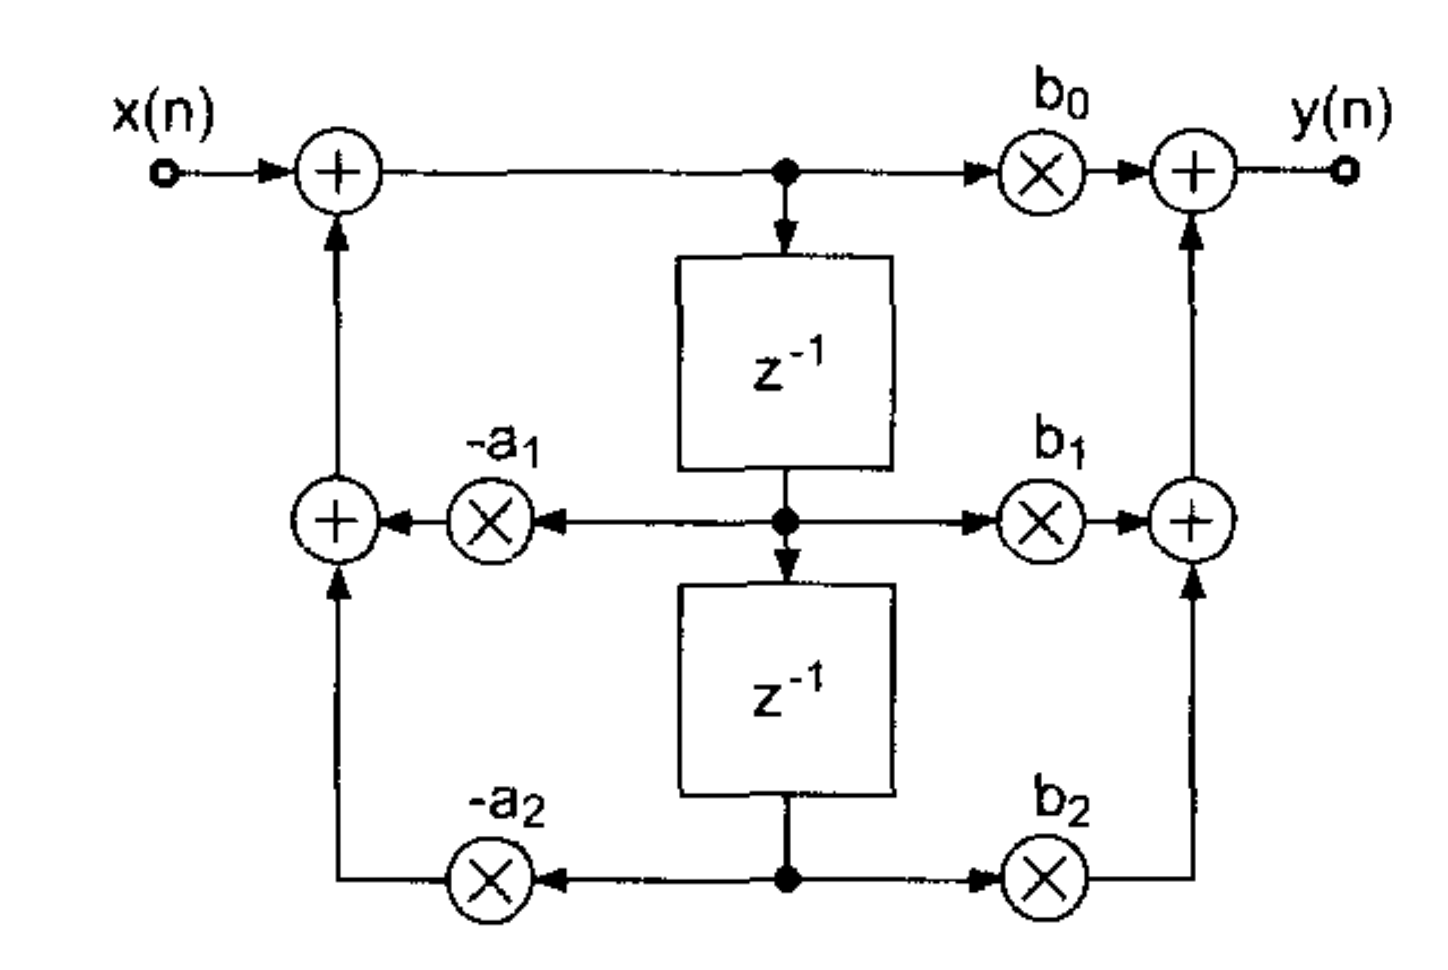

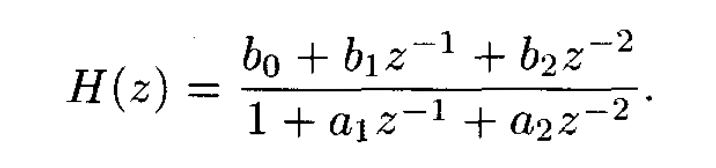


#### Analog Sallen-Key 2nd order lowpass filter, which exhibits similar response to the above 
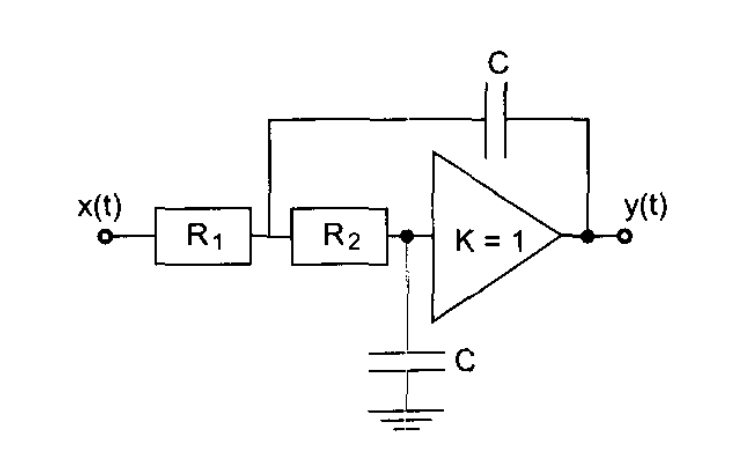

2nd order canonical lowpass is implemented using a very simple equation so can be calculated quickly and easily, but changing cutoff or Q involves complex calculations of all five filter co-efficients so quickly changing cutoff frequency is computationally intensive.

In [8]:
def secondOrderFilter(x, cutoff_freq, sample_rate, Q, filter_type):
    K = np.tan(np.pi*cutoff_freq/sample_rate)
    
    if(filter_type == "lowpass"):
        b0 = (K**2 * Q) / (K**2 * Q + K + Q)
        b1 = (2 * K**2 * Q) / (K**2 * Q + K + Q)
        b2 = (K**2 * Q) / (K**2 * Q + K + Q)
        a1 = (2*Q*(K**2 - 1)) / (K**2 * Q + K + Q)
        a2 = (K**2 * Q - K + Q) / (K**2 * Q + K + Q)
    elif(filter_type == "highpass"):
        b0 = Q / (K**2 * Q + K + Q)
        b1 = -2*Q / (K**2 * Q + K + Q)
        b2 = Q / (K**2 * Q + K + Q)
        a1 = (2*Q * (K**2 - 1)) / (K**2 * Q + K + Q)
        a2 = (K**2 * Q - K + Q) / (K**2 * Q + K + Q)
    elif(filter_type == "bandpass"):
        b0 = K / (K**2 * Q + K + Q)
        b1 = 0
        b2 = -K / (K**2 * Q + K + Q)
        a1 = (2*Q * (K**2 - 1)) / (K**2 * Q + K + Q)
        a2 = (K**2 * Q - K + Q) / (K**2 * Q + K + Q)
    elif(filter_type == "bandreject"):
        b0 = (Q * (1 + K**2)) / (K**2 * Q + K + Q)
        b1 = (2 * Q * (K**2 - 1)) / (K**2 * Q + K + Q)
        b2 = (Q * (1 + K**2)) / (K**2 * Q + K + Q)
        a1 = (2 * Q * (K**2 - 1)) / (K**2 * Q + K + Q)
        a2 = (K**2 * Q - K + Q) / (K**2 * Q + K + Q)
    elif(filter_type == "allpass"):
        b0 = (K**2 * Q - K + Q) / (K**2 * Q + K + Q)
        b1 = (2 * Q * (K**2 - 1)) / (K**2 * Q + K + Q)
        b2 = 1
        a1 = (2 * Q * (K**2 - 1)) / (K**2 * Q + K + Q)
        a2 = (K**2 * Q - K + Q) / (K**2 * Q + K + Q)
        
    y = np.zeros(len(x))
    
    for n in range(len(x)):
        y[n] = b0 * x[n] + b1 * x[n-1] + b2 * x[n-2] - a1 * y[n-1] - a2 * y[n-2]
    
    
    return y

In [14]:
data, sr = sf.read("sig.wav")

y = secondOrderFilter(data, 400, sr, 100, "lowpass")

Audio(y, rate = sr)

## State Variable Filter

Used commonly in analog synths: Oberheim OB-X, Yamaha CS-80

Has simultaneous lowpass, highpass and bandpass (and occasionally notch) outputs

Simple relationship between control parameters and filter coefficients. Much easier than canonical 2nd order filter to quickly change cutoff or resonance

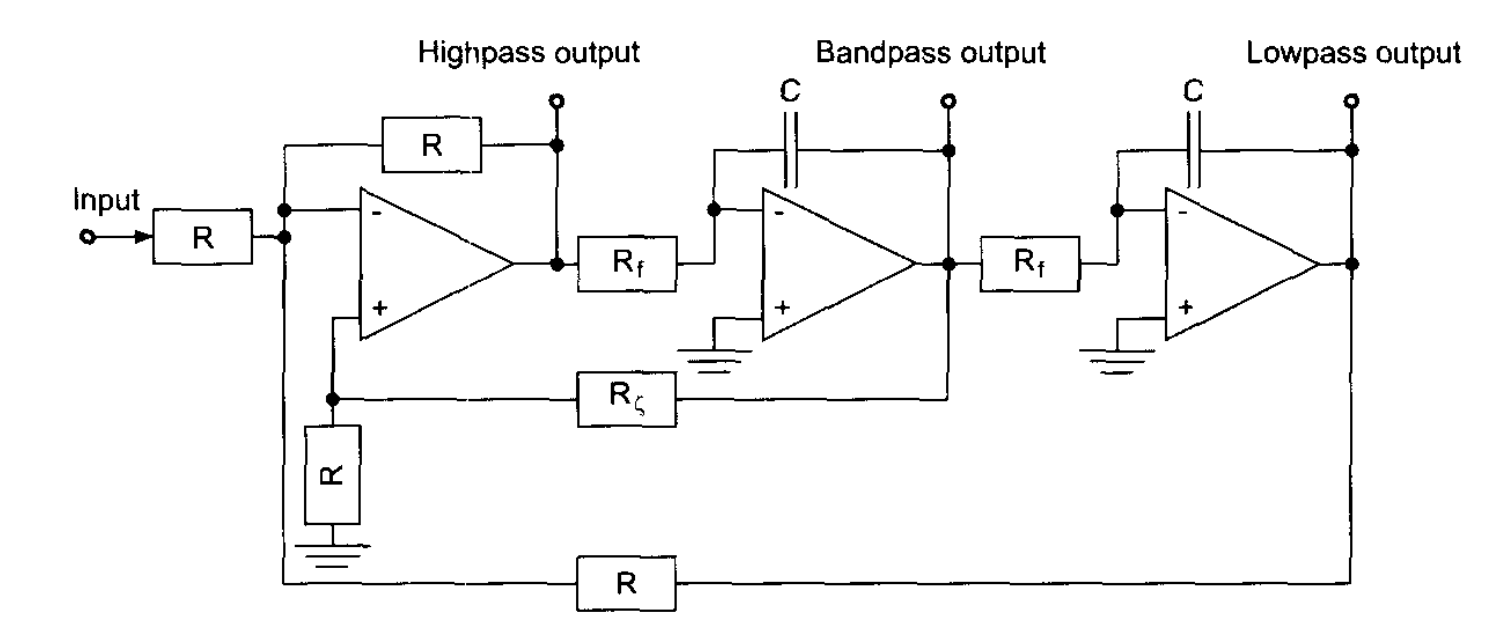
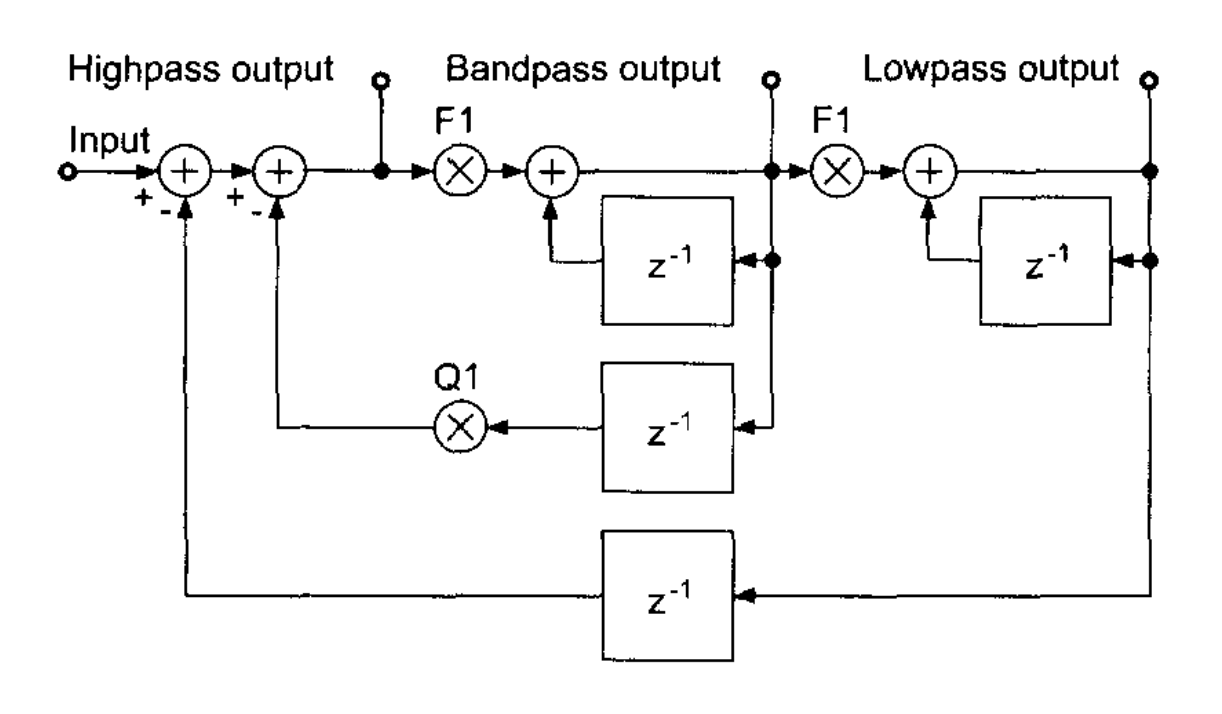


In [ ]:
data, sr = sf.read("sig.wav")

y = stateVariable(data, 700, sr, 1, "lowpass")

Audio(y, rate = sr)

### A filter sweep